In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, PrecisionRecallDisplay,precision_recall_curve

sns.set_style("whitegrid")

In [27]:
# We import the dataframe with the 8 features we are considering
PA_df=pd.read_csv("cover_my_med_df.csv")

In [28]:
# In case we want to restrict the date to a smaller set
PA_df=PA_df[:20]

In [29]:
# Extract the features
features= PA_df.columns[:-1]

In [30]:
## import train_test_split
from sklearn.model_selection import train_test_split

In [31]:
## making a stratified train test split
approval_train, approval_test = train_test_split(PA_df.copy(),
                                              shuffle=True,
                                              random_state=42,
                                              test_size=.15,
                                              stratify=PA_df.pa_approved.values)

In [32]:
## import LinearSVC here
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [33]:
## import the correct kfold class
from sklearn.model_selection import StratifiedKFold

## import Pipeline and StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## import accuracy_score
from sklearn.metrics import accuracy_score

In [34]:
## set the number of CV folds
n_splits = 10

## Make the kfold object
kfold = StratifiedKFold(n_splits, random_state=403, shuffle=True)

## the values of C you will try
Cs = [.01, .1, 1, 10, 25, 50, 75, 100, 125, 150]

## this will hold the CV accuracies
C_accs1 = np.zeros((n_splits, len(Cs)))


## the cross-validation loop
i = 0
for train_index, test_index in kfold.split(approval_train, approval_train.pa_approved.values):
    approval_tt = approval_train.iloc[train_index]
    approval_ho = approval_train.iloc[test_index]
    
    j = 0
    ## loop through all possible values of C
    for C in Cs:
        ## make the model, fit it and get the prediction 
        pipe = Pipeline([('scale', StandardScaler()),
                            ('svm', SVC(C=C))])
        pipe.fit(approval_tt[features],
                    approval_tt.pa_approved)
    
        pred = pipe.predict(approval_ho[features])

        C_accs1[i, j] = accuracy_score(approval_ho.pa_approved, pred)
        

        
        j = j + 1
    i = i + 1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


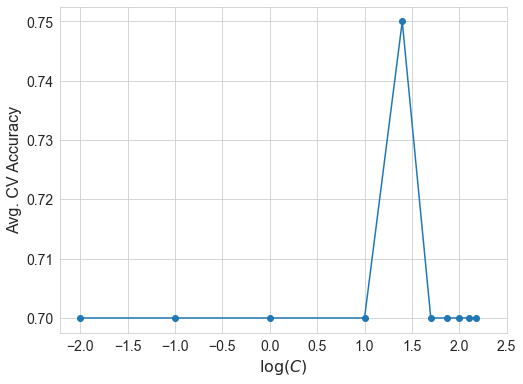

In [23]:
plt.figure(figsize = (8,6))

plt.plot(np.log10(np.array(Cs)), 
         np.mean(C_accs1, axis=0), 
         '-o')

plt.xlabel("$\log(C)$", fontsize=16)
plt.ylabel("Avg. CV Accuracy", fontsize=16)
plt.xticks(np.arange(-2,3,.5),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

We can refine the search based on the graph above and find the optimal values of $C$ as follows:

In [24]:
## set the number of CV folds
n_splits = 10

## Make the kfold object
kfold = StratifiedKFold(n_splits, random_state=403, shuffle=True)

## the values of C you will try
Cs = np.arange(10,51,1)

## this will hold the CV accuracies
C_accs2 = np.zeros((n_splits, len(Cs)))


## the cross-validation loop
i = 0
for train_index, test_index in kfold.split(approval_train, approval_train.pa_approved.values):
    approval_tt = approval_train.iloc[train_index]
    approval_ho = approval_train.iloc[test_index]
    
    j = 0
    ## loop through all possible values of C
    for C in Cs:
        ## make the model, fit it and get the prediction 
        pipe = Pipeline([('scale', StandardScaler()),
                            ('svm', SVC(C=C))])
        pipe.fit(approval_tt[features],
                    approval_tt.pa_approved)
    
        pred = pipe.predict(approval_ho[features])

        C_accs2[i, j] = accuracy_score(approval_ho.pa_approved, pred)
        

        
        j = j + 1
    i = i + 1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


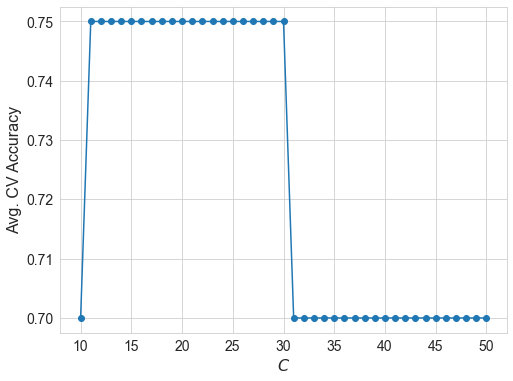

In [25]:
plt.figure(figsize = (8,6))

plt.plot(Cs, 
         np.mean(C_accs2, axis=0), 
         '-o')

plt.xlabel("$C$", fontsize=16)
plt.ylabel("Avg. CV Accuracy", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()